In [17]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, how='left', on='city')

# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

Text(0.92,0.7,'Note: \nCircle size correlates with driver count per city.')

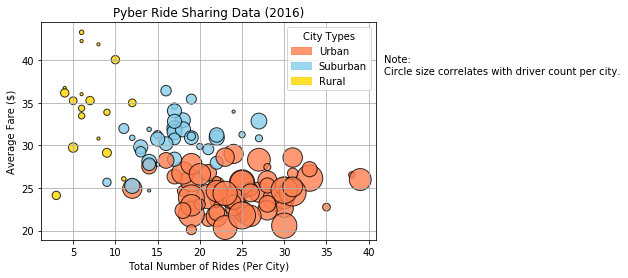

In [16]:
# Create a dataframe that includes total amount of rides and average fare for each city
total_rides = ride_df.groupby(by='city')['ride_id'].count().reset_index(name='total rides')
avg_fare = ride_df.groupby(by='city')['fare'].mean().reset_index(name='avg fare')

ride_data = pd.merge(total_rides, avg_fare, how='inner', on='city')

# Combine the data into a single dataset
bubble_df = pd.merge(ride_data, city_df, how='left', on='city')

# Obtain the x and y coordinates for each of the three city types
x = bubble_df['total rides']
y = bubble_df['avg fare']
colors = {
    'Urban': 'coral',
    'Suburban': 'skyblue',
    'Rural': 'gold'
}
area = bubble_df['driver_count']

# Build the scatter plots for each city types
plt.scatter(x, y, marker="o", s=area*10, edgecolors='black', c=bubble_df['type'].apply(lambda x: colors[x]), alpha = 0.8)

# urban, = plt.plot(urban_x, urban_y, label='Urban', linestyle="None", color='coral', marker='o', markersize=urban_s)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
urban = mpatches.Patch(color='coral', label='Urban', alpha=0.8)
suburban = mpatches.Patch(color='skyblue', label='Suburban', alpha=0.8)
rural = mpatches.Patch(color='gold', label='Rural', alpha=0.8)
plt.legend(handles=[urban, suburban, rural], title="City Types")

# Incorporate a text label regarding circle size
plt.gcf().text(.92, 0.7, "Note: \nCircle size correlates with driver count per city.", fontsize=10)

# Save Figure
# plt.savefig("../Images/pyber_bubble.png")

In [11]:
# # Obtain the x and y coordinates for each of the three city types
# urban_x = bubble_df[bubble_df['type']=='Urban']['total rides']
# urban_y = bubble_df[bubble_df['type']=='Urban']['avg fare']
# urban_s = bubble_df[bubble_df['type']=='Urban']['driver_count']

# # Build the scatter plots for each city types
# urban, = plt.plot(urban_x, urban_y, c='coral', label='Urban', marker="o", linestyle='None')

# # Incorporate the other graph properties
# plt.title("Pyber Ride Sharing Data (2016)")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.ylabel("Average Fare ($)")
# plt.grid()

# # Create a legend
# plt.legend()

# # Incorporate a text label regarding circle size

# # Save Figure
# plt.show()

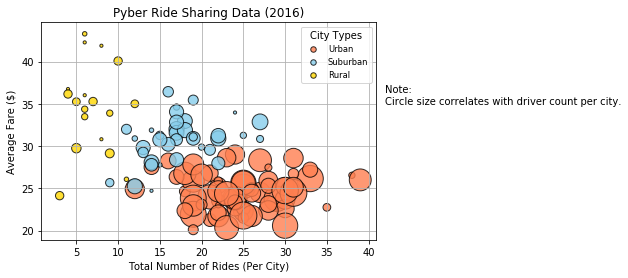

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

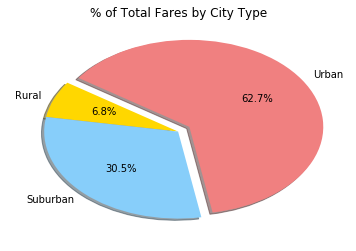

In [65]:
# Calculate Type Percents
perc = pd.DataFrame(city_ride_df.groupby('type')['fare'].sum())

perc['% of Total'] = perc['fare'] / perc['fare'].sum()

perc = perc.reset_index()
perc['type'] = pd.Categorical(perc['type'], ["Urban", "Rural", "Suburban"])
perc = perc.sort_values('type')

# Build Pie Chart
city_type = perc['type']
fare = perc['fare']
perc_total = perc['% of Total']
colors = ['lightcoral','gold','lightskyblue']
explode = [0.1, 0, 0]

plt.pie(perc_total, explode=explode, labels=city_type, shadow=True, startangle=280, autopct="%1.1f%%", colors=colors)
plt.title("% of Total Fares by City Type")

# Save Figure
# plt.savefig("../Images/pyberpie_fares.png")

In [66]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Fares by City Type')

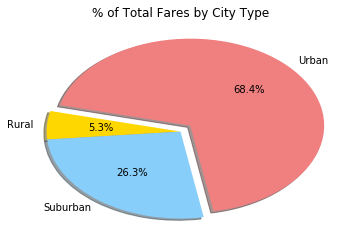

In [75]:
# Calculate Ride ridesents
rides = pd.DataFrame(city_ride_df.groupby('type')['ride_id'].count())
rides['% of Total'] = rides['ride_id'] / rides['ride_id'].sum()

rides = rides.reset_index()
rides['type'] = pd.Categorical(rides['type'], ["Urban", "Rural", "Suburban"])
rides = rides.sort_values('type')

# Build Pie Chart
city_type = rides['type']
fare = rides['ride_id']
rides_total = rides['% of Total']
colors = ['lightcoral','gold','lightskyblue']
explode = [0.1, 0, 0]

plt.pie(rides_total, explode=explode, labels=city_type, shadow=True, startangle=280, autopct="%1.1f%%", colors=colors)
plt.title("% of Total Rides by City Type")

# Save Figure
# plt.savefig("../Images/pyberpie_rides.png")

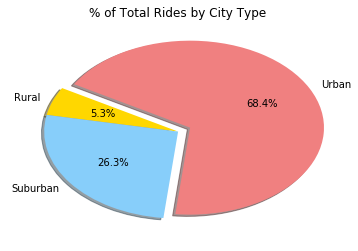

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5,1,'% of Total driver_counts by City Type')

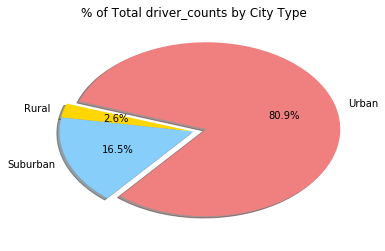

In [83]:
# Calculate Driver driversents
drivers = pd.DataFrame(city_df.groupby('type')['driver_count'].sum())

drivers['% of Total'] = drivers['driver_count'] / drivers['driver_count'].sum()

drivers = drivers.reset_index()
drivers['type'] = pd.Categorical(drivers['type'], ["Urban", "Rural", "Suburban"])
drivers = drivers.sort_values('type')

# Build Pie Charts
city_type = drivers['type']
driver_count = drivers['driver_count']
drivers_total = drivers['% of Total']
colors = ['lightcoral','gold','lightskyblue']
explode = [0.1, 0, 0]

plt.pie(drivers_total, explode=explode, labels=city_type, shadow=True, startangle=230, autopct="%1.1f%%", colors=colors)
plt.title("% of Total driver_counts by City Type")

# Save Figure
# plt.savefig("../Images/pyberpie_driver_counts.png")

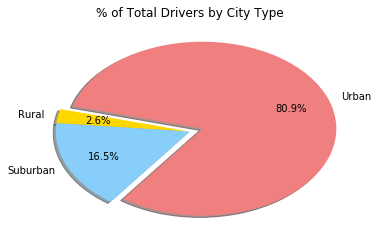

In [6]:
# Show Figure
plt.show()